# Explore $n$-dimensional arrays

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## Load the arrays

👉 First, let's load four arrays stored in NPY format, using the [`numpy.load` function](https://numpy.org/doc/stable/reference/generated/numpy.load.html).

In [ ]:
! curl https://wagon-public-datasets.s3.amazonaws.com/03-Maths/algebra_explore_arrays.zip --output arrays.zip
! unzip arrays.zip
! rm arrays.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18.2M  100 18.2M    0     0  32.0M      0 --:--:-- --:--:-- --:--:-- 32.5M
Archive:  arrays.zip
  inflating: array_1.npy             
  inflating: array_2.npy             
  inflating: array_3.npy             
  inflating: array_4.npy             


In [ ]:
array_1 = np.load("array_1.npy")
array_2 = np.load("array_2.npy")
array_3 = np.load("array_3.npy")
array_4 = np.load("array_4.npy")

In [ ]:
# Inspect their shape, size, ndim...

for array in [array_1, array_2, array_3, array_4]:
    print(array.ndim, "|", array.shape, "|", array.size, "|", array.dtype, "|", array.min(), "|", array.max())

1 | (85847,) | 85847 | int32 | -1562174464 | 1831925248
2 | (2000, 3000) | 6000000 | int16 | 5 | 255
3 | (2808, 1872, 4) | 21026304 | uint8 | 0 | 255
4 | (38, 328, 330, 3) | 12339360 | uint8 | 14 | 250


**🧐 Given these properties, what could each arrays represent? Write your guess below!**



In [ ]:
guess_1 = "Something?"
guess_2 = "Something?"
guess_3 = "Something?"
guess_4 = "Something?"

## What is `array_1`?

In [ ]:
print(array_1.ndim, "|", array_1.shape, "|", array_1.size, "|", array_1.dtype, "|", array_1.min(), "|", array_1.max())

1 | (85847,) | 85847 | int32 | -1562174464 | 1831925248


👉 Plot `array_1` with `plt`

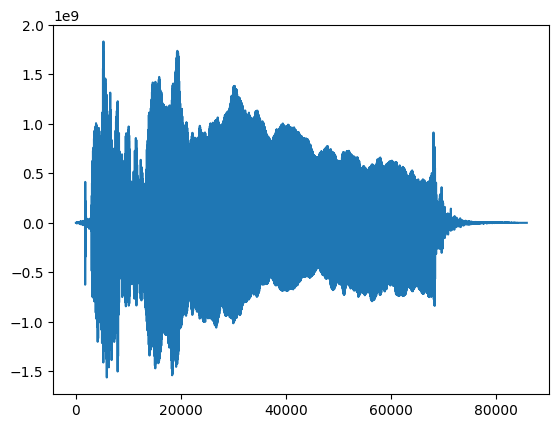

In [ ]:
plt.plot(array_1);

👉 Does this "shape" *sound* familiar? Run the following snippet:

In [ ]:
from IPython.display import Audio
rate=48_000
Audio(array_1, rate=rate)

👉 Use NumPy's `slicing` to isolate one part of the sound

In [ ]:
Audio(array_1[20_000:50_000], rate=rate)

👉 Try dividing the rate by 2?

In [ ]:
Audio(array_1, rate=rate/2)

👉 Now you can use the [`scipy.io.wavfile.write`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.write.html) function to save the array as a WAV file. Give it a proper name ;) 

In [ ]:
from scipy.io import wavfile

wavfile.write("maow.wav", rate=rate, data=array_1)

## What is `array_2`?

In [ ]:
print(array_2.ndim, "|", array_2.shape, "|", array_2.size, "|", array_2.dtype, "|", array_2.min(), "|", array_2.max())

2 | (2000, 3000) | 6000000 | int16 | 5 | 255


👉 Use `matplotlib.pyplot.imshow`, with the most appropriate [`cmap` (colormap)](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

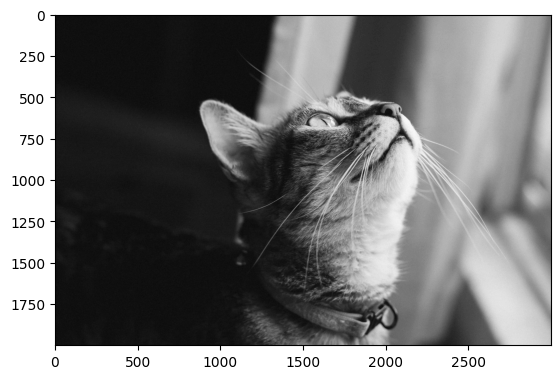

In [ ]:
plt.imshow(array_2, cmap="gray");

👉 Use NumPy's `slicing` to isolate one part of the image

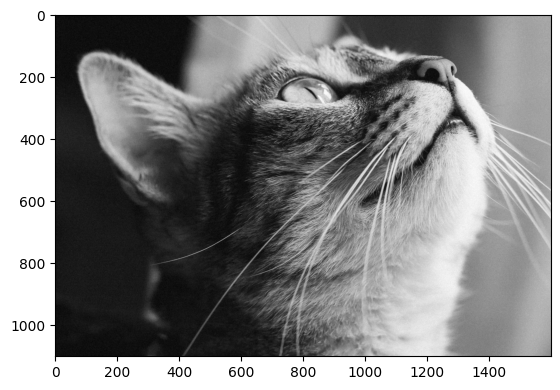

In [ ]:
plt.imshow(array_2[400:1500, 800:2400], cmap="gray");

👉 What does the following line do? Show the resulting image with `matplotlib.pyplot.imshow`!

<details>
<summary><i>Answer</i></summary>
    
It downscales the image by taking only one 1 row out of 3 and 1 column out of 3 from the initial image
</details>

(2000, 3000)  ->  (667, 1000)


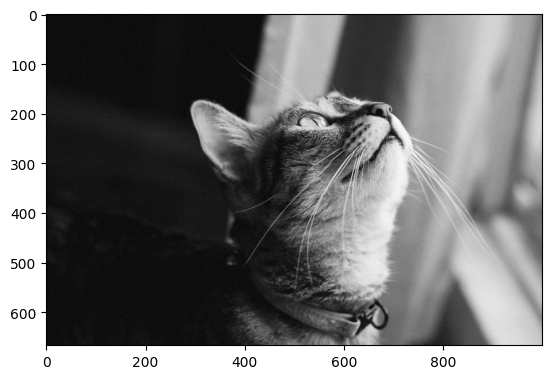

In [ ]:
array_2bis = array_2[::3, ::3]

print(array_2.shape, " -> ", array_2bis.shape)
plt.imshow(array_2bis, cmap="gray");

👉 Run the following line to see how the pixels' value are distributed:

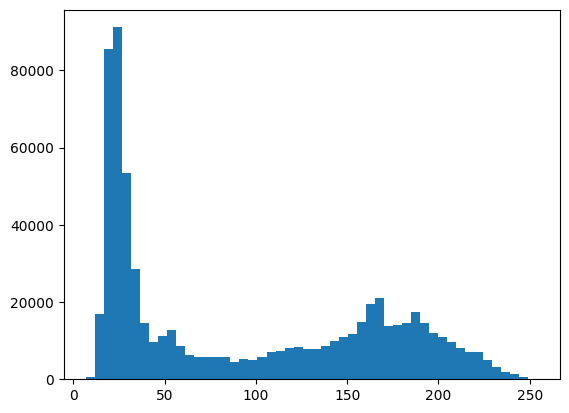

In [ ]:
plt.hist(array_2bis.ravel(), bins=50);

👉 What do the following lines do? 

<details>
<summary><i>Answer</i></summary>
    
With NumPy's magic `boolean indexing`: 

- all values inferior to 0.5 are replaced by 0. (black)

- all values superior to 0.5 are replaced by 1. (white)

Here the image is *binarized*
</details>

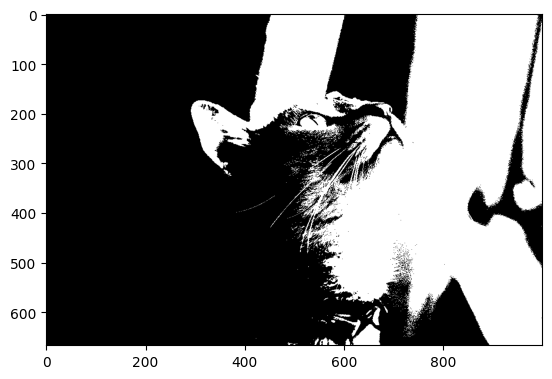

In [ ]:
array_2ter = array_2bis.copy()
array_2ter[array_2bis < 128] = 0
array_2ter[array_2bis >= 128] = 1

plt.imshow(array_2ter, cmap="gray");

👉 Save your image as a PNG file or as a JPEG file using [`matplotlib.pyplot.imsave`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imsave.html) (again, use the appropriate `cmap`)

In [ ]:
plt.imsave("bnw_cat.png", array_2ter, cmap="gray")

# Now check if you can open the file!

## What is `array_3`?

In [ ]:
print(array_3.ndim, "|", array_3.shape, "|", array_3.size, "|", array_3.dtype, "|", array_3.min(), "|", array_3.max())

3 | (2808, 1872, 4) | 21026304 | uint8 | 0 | 255


👉 Inspect the *4 channels*, by running the following snippet of code

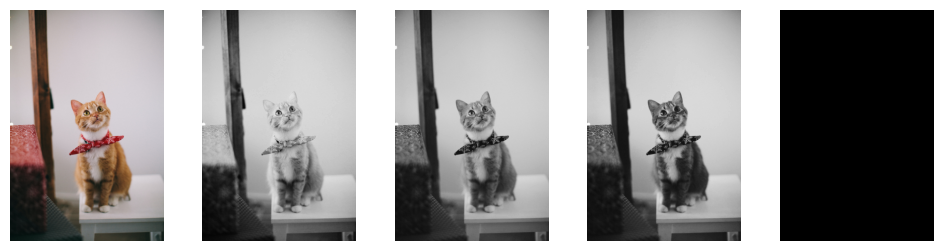

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(12, 3))
axi = axs.flat # axi is an "iterator" of axes

ax = next(axi)
ax.imshow(array_3, )
ax.axis("off")

ax = next(axi)
ax.imshow(array_3[:,:,0], cmap="gray")
ax.axis("off")

ax = next(axi)
ax.imshow(array_3[:,:,1], cmap="gray")
ax.axis("off")

ax = next(axi)
ax.imshow(array_3[:,:,2], cmap="gray")
ax.axis("off")

ax = next(axi)
ax.imshow(array_3[:,:,3], cmap="gray")
ax.axis("off");

👉 Can you guess what are the four channels?

<details>
<summary><i>Answer</i></summary>
RGB + A 

A (alpha) is the opacity channel. Here all pixels are 1. (= opaque).
</details>

❓ **Let's figure-it out**
- Create a new 2D array that, for each pixel of the original image, if the value in the *1st* channel (red) is inferior to 175 (out of 255), set a value to 1 (= opaque). Otherwise set it to 0 (= transparent).
- Then, plot it with `cmap="Reds"` and check your intuition!
- Do it with Greens and Blues too!

(-0.5, 1871.5, 2807.5, -0.5)

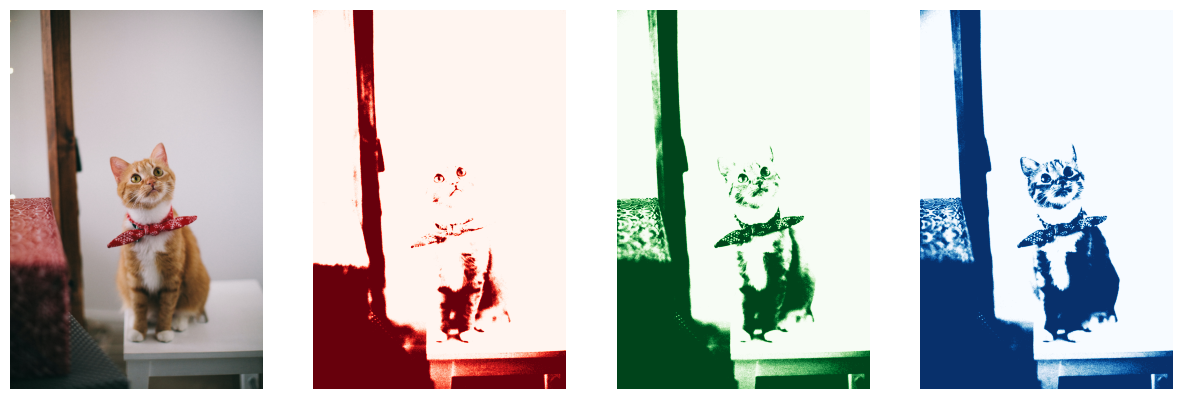

In [ ]:
array_3_large_reds = (array_3[:,:,0] < 175).astype(int) * 255
array_3_large_greens = (array_3[:,:,1] < 175).astype(int) * 255
array_3_large_blues = (array_3[:,:,2] < 175).astype(int) * 255

fig, axs = plt.subplots(1, 4, figsize=(15, 5))
axi = axs.flat # axi is an "iterator" of axes

ax = next(axi)
ax.imshow(array_3)
ax.axis("off")

ax = next(axi)
ax.imshow(array_3_large_reds, cmap="Reds")
ax.axis("off")

ax = next(axi)
ax.imshow(array_3_large_greens, cmap="Greens")
ax.axis("off")

ax = next(axi)
ax.imshow(array_3_large_blues, cmap="Blues")
ax.axis("off")

☝️ The blue channel is interesting! It isolates almost perfectly the cat from its surrounding. Let's use this to make a transparent cat to copy paste on any background!

👉 What does the following line do? 

<details>
  <summary markdown='span'>🎁 Answer</summary>

"For each pixel in initial image, if the intensity of blue channel is strong, set the opacity (4th channel) to max. Otherwise set it to 0 (= transparent)"  

</details>

(-0.5, 1871.5, 2807.5, -0.5)

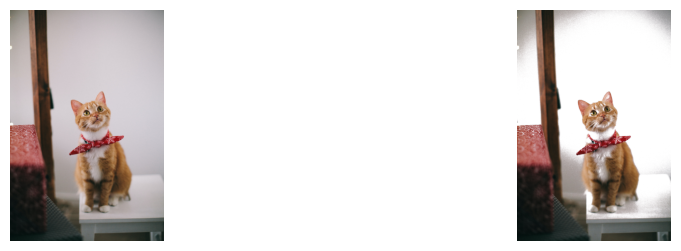

In [ ]:
array_3_transparent = array_3.copy()
array_3_transparent[:,:,3] = (array_3_transparent[:,:,2] < 175).astype(int) * 255

fig, axs = plt.subplots(1, 2, figsize=(12, 3))
axi = axs.flat # axi is an "iterator" of axes

ax = next(axi)
ax.imshow(array_3, )
ax.axis("off")

ax = next(axi)
ax.imshow(array_3_transparent, )
ax.axis("off")

👉 Save this new array_3_bis as PNG file (⚠️ the JPG format does not support transparency)

In [ ]:
plt.imsave( "transparent_cat.png", array_3_transparent)

## What is `array_4`?

In [ ]:
print(array_4.ndim, "|", array_4.shape, "|", array_4.size, "|", array_4.dtype, "|", array_4.min(), "|", array_4.max())

4 | (38, 328, 330, 3) | 12339360 | uint8 | 14 | 250


👉 Inspect the frames by running the following snippet:

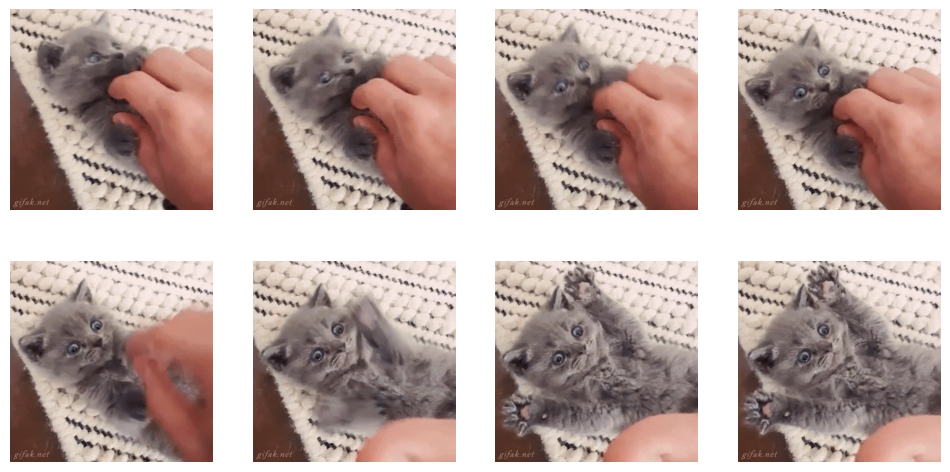

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(12, 6)) 
axi = axs.flat
for frame in np.arange(0, 38, 5):
    ax = next(axi)
    ax.imshow(array_4[frame, :, :, :]),
    ax.axis("off")

👉 Save it as a GIF file!

In [ ]:
from PIL import Image

frames_img = [Image.fromarray(frame) for frame in array_4]
first_frame = frames_img[0]
first_frame.save("kitten.gif", save_all=True, append_images=frames_img[1:], duration=100, loop=0)